In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection, feature_selection
from sklearn import ensemble
from sklearn import impute, linear_model, mixture
import scipy
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings('ignore')
import imblearn

In [179]:
train=pd.read_csv('train_HRAnalytics.csv')
test=pd.read_csv('test_HRAnalytics.csv')

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [181]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [182]:
def isnull(df, features):
    for features in features:
        if df[features].isnull().sum()>1:
            print(features, df[features].isnull().sum())

In [183]:
isnull(train, train.columns)

education 2409
previous_year_rating 4124


In [184]:
isnull(test, test.columns)

education 1034
previous_year_rating 1812


In [185]:
def vizplot(cat_plot, num_plot, df, features):
    for features in features:

            if df[features].nunique()<20 or df[features].dtypes=='O' :
                vc=df[features].value_counts()
                print("value counts :", vc)
                plot=cat_plot
                x=df[features].dropna().unique()
                h=df[features].dropna().value_counts()
                plot(x,h)
                plt.title(features)
                plt.xticks(rotation=90)
                plt.show()

            elif df[features].dtypes!='O' and features not in 'employee_id' and df[features].nunique()>20:
                plot=num_plot
                plot(df[features].dropna())
                plt.title(features)
                plt.show()


value counts : Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


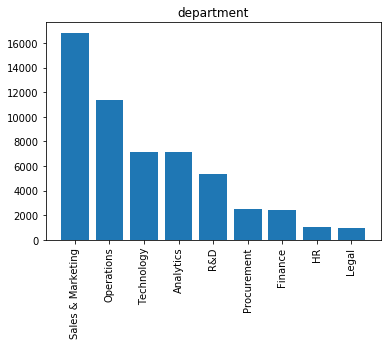

value counts : region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64


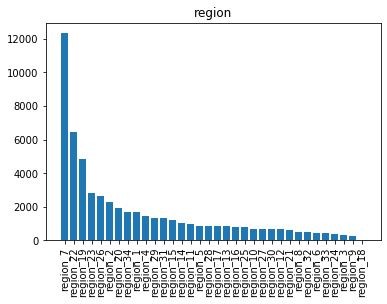

value counts : Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


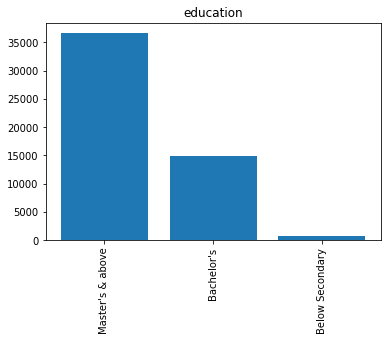

value counts : m    38496
f    16312
Name: gender, dtype: int64


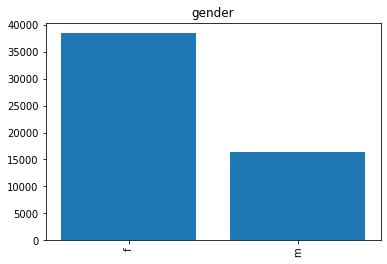

value counts : other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64


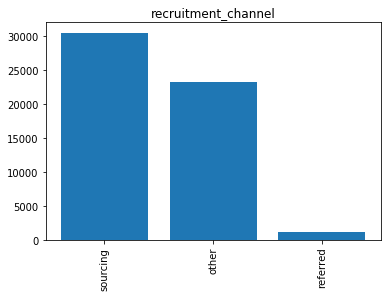

value counts : 1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


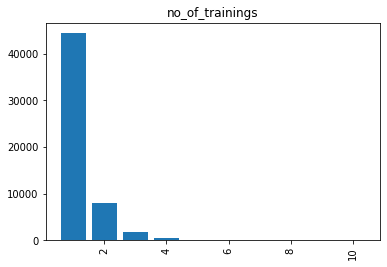

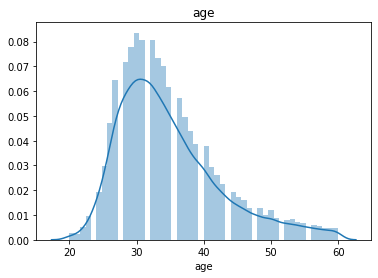

value counts : 3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


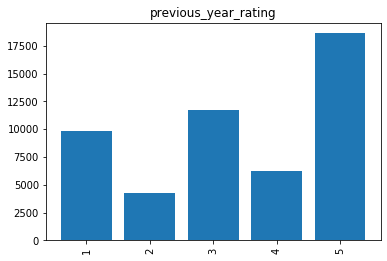

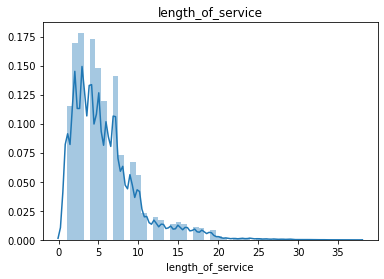

value counts : 0    35517
1    19291
Name: KPIs_met >80%, dtype: int64


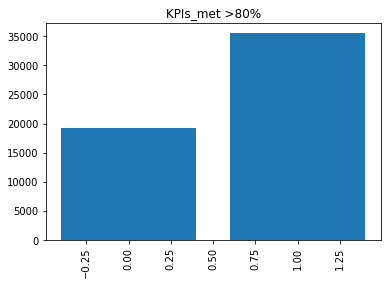

value counts : 0    53538
1     1270
Name: awards_won?, dtype: int64


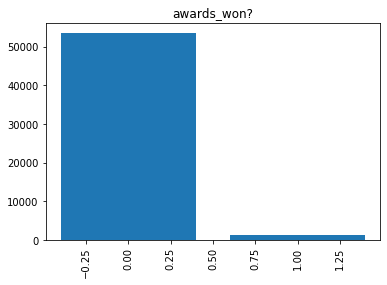

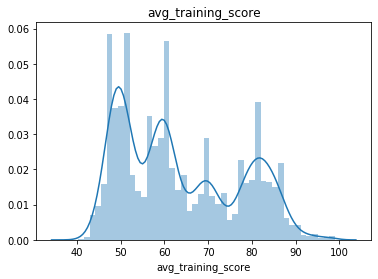

value counts : 0    50140
1     4668
Name: is_promoted, dtype: int64


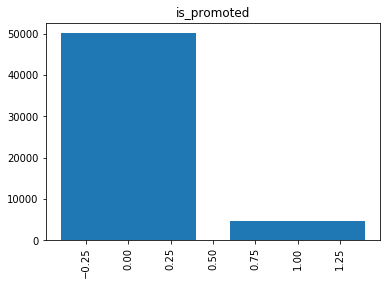

In [186]:
vizplot(cat_plot=plt.bar, num_plot=sns.distplot, df=train, features=train.columns )

In [187]:
def fillna(df, features):
    for features in features:
        if df[features].dtypes=='O':
            print('---- categorical features ---')
            df[features]=df[features].fillna(df[features].mode()[0])
            print(features, df[features].isnull().sum())
            
        elif df[features].dtypes!='O':
            print('---- numerical features-----')
            df[features]=df[features].fillna(df[features].median())
            print(features, df[features].isnull().sum())

In [188]:
fillna(train, train.columns)

---- numerical features-----
employee_id 0
---- categorical features ---
department 0
---- categorical features ---
region 0
---- categorical features ---
education 0
---- categorical features ---
gender 0
---- categorical features ---
recruitment_channel 0
---- numerical features-----
no_of_trainings 0
---- numerical features-----
age 0
---- numerical features-----
previous_year_rating 0
---- numerical features-----
length_of_service 0
---- numerical features-----
KPIs_met >80% 0
---- numerical features-----
awards_won? 0
---- numerical features-----
avg_training_score 0
---- numerical features-----
is_promoted 0


In [189]:
isnull(train, train.columns)

In [190]:
fillna(test, test.columns)

---- numerical features-----
employee_id 0
---- categorical features ---
department 0
---- categorical features ---
region 0
---- categorical features ---
education 0
---- categorical features ---
gender 0
---- categorical features ---
recruitment_channel 0
---- numerical features-----
no_of_trainings 0
---- numerical features-----
age 0
---- numerical features-----
previous_year_rating 0
---- numerical features-----
length_of_service 0
---- numerical features-----
KPIs_met >80% 0
---- numerical features-----
awards_won? 0
---- numerical features-----
avg_training_score 0


In [191]:
isnull(test, test.columns)

In [192]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [193]:
train.education=train.education.map({"Master's & above":0, "Bachelor's":1, "Below Secondary":2} )
test.education=test.education.map({"Master's & above":0, "Bachelor's":1, "Below Secondary":2} )

In [194]:
train.education.value_counts()

1    39078
0    14925
2      805
Name: education, dtype: int64

In [204]:
def encoding(df, features):
    for features in features:
        if df[features].dtypes=='O' and features not in 'employee_id':
            df[features]=preprocessing.LabelEncoder().fit_transform(df[features])
            print(features)

In [205]:
encoding(train, train.columns)

department
region
gender
recruitment_channel


In [207]:
encoding(test, test.columns)

department
region
gender
recruitment_channel


In [206]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,0,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,1,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,1,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,1,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,1,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,1,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,19,0,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,0,1,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,33,1,1,2,1,29,1.0,2,0,0,45,0


In [208]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,1,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,1,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,1,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,1,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,1,1,2,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,2,1,2,1,24,3.0,1,0,0,61
23486,25600,8,17,1,1,2,1,31,3.0,7,0,0,74
23487,45409,2,7,1,0,2,1,26,4.0,4,0,0,50
23488,1186,5,24,1,1,2,3,27,3.0,1,0,0,70


In [214]:
X=train.drop('is_promoted', axis=1)
y=train.is_promoted

In [211]:
nearmiss=imblearn.under_sampling.NearMiss()

In [219]:
X_nearmiss, y_nearmiss=nearmiss.fit_sample(X,y)

In [221]:
X_nearmiss.shape, X.shape


((9336, 13), (54808, 13))

In [222]:
y_nearmiss.shape, y.shape

((9336,), (54808,))

In [229]:
def modelpredict(model, X_nearmiss, y_nearmiss):
    model.fit(X_nearmiss, y_nearmiss)
    print('model nearmiss score:',model.score(X_nearmiss, y_nearmiss))
    print('model total score:', model.score(X,y))
    print('model predict:', model.predict(X_nearmiss))
    print('value count nearmiss predict:', pd.DataFrame(model.predict(X_nearmiss)).value_counts())
    print('model total predict: ', model.predict(X))
    print('value count total predict: ', pd.DataFrame(model.predict(X)).value_counts())

In [230]:
modelpredict(linear_model.LogisticRegression(), X_nearmiss, y_nearmiss)

model nearmiss score: 0.5300985432733505
model total score: 0.42198219238067436
model predict: [0 1 1 ... 1 1 1]
value count nearmiss predict: 1    5927
0    3409
dtype: int64
model total predict:  [0 0 1 ... 1 1 0]
value count total predict:  1    33220
0    21588
dtype: int64


In [231]:
modelpredict(ensemble.RandomForestClassifier(), X_nearmiss, y_nearmiss)

model nearmiss score: 1.0
model total score: 0.7484491315136477
model predict: [0 0 0 ... 1 1 1]
value count nearmiss predict: 1    4668
0    4668
dtype: int64
model total predict:  [1 0 0 ... 1 0 0]
value count total predict:  0    36353
1    18455
dtype: int64


In [232]:
modelpredict(ensemble.AdaBoostClassifier(), X_nearmiss, y_nearmiss)

model nearmiss score: 0.7539631533847472
model total score: 0.7037293825718873
model predict: [1 0 0 ... 1 1 0]
value count nearmiss predict: 0    4801
1    4535
dtype: int64
model total predict:  [1 0 0 ... 1 0 0]
value count total predict:  0    36332
1    18476
dtype: int64
